<a href="https://colab.research.google.com/github/Ishraqalibon/Recommendation_system/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/netflix_data.csv')

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


In [ ]:
data.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
duration,int64
description,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [ ]:
data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
duration,0
description,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(4812, 11)

In [ ]:
data['title'].duplicated().sum()

0

In [ ]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [ ]:
top_genre=data['genre'].value_counts().head(10)
top_genre

,count
genre,
Dramas,1343
Comedies,1029
Action,696
Children,421
Documentaries,352
Stand-Up,283
Horror Movies,239
International Movies,100
Classic Movies,69


In [ ]:
data.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


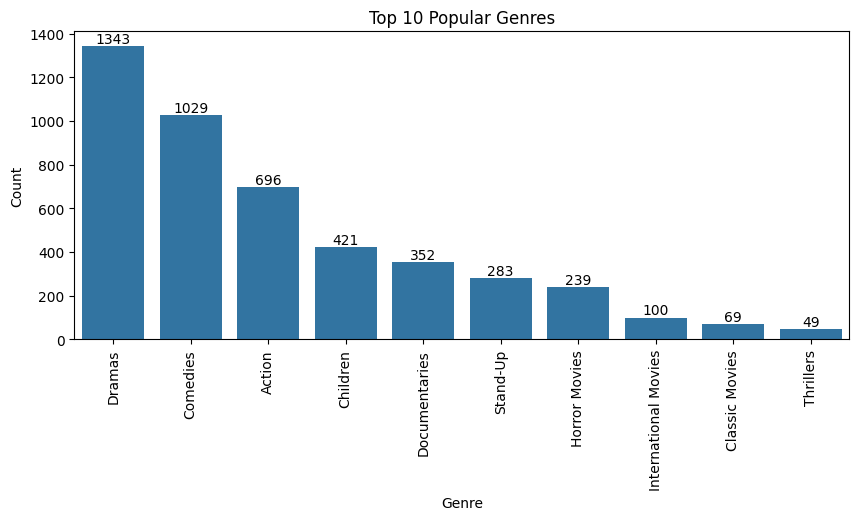

In [ ]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=top_genre.index,y=top_genre.values)
plt.xticks(rotation=90)
plt.title('Top 10 Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [ ]:
release_year=data['release_year'].value_counts().head(5)
release_year

,count
release_year,
2017,646
2018,624
2016,562
2019,488
2020,379


In [ ]:
show_type=data['type'].value_counts()

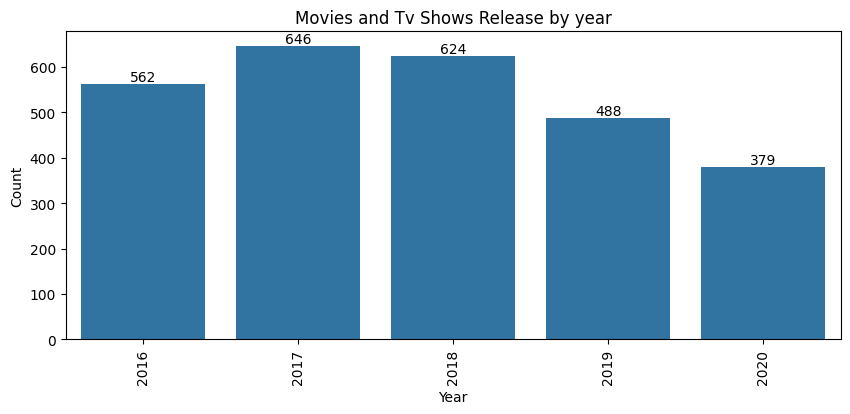

In [ ]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=release_year.index,y=release_year.values)
plt.xticks(rotation=90)
plt.title('Movies and Tv Shows Release by year')
plt.xlabel('Year')
plt.ylabel('Count')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

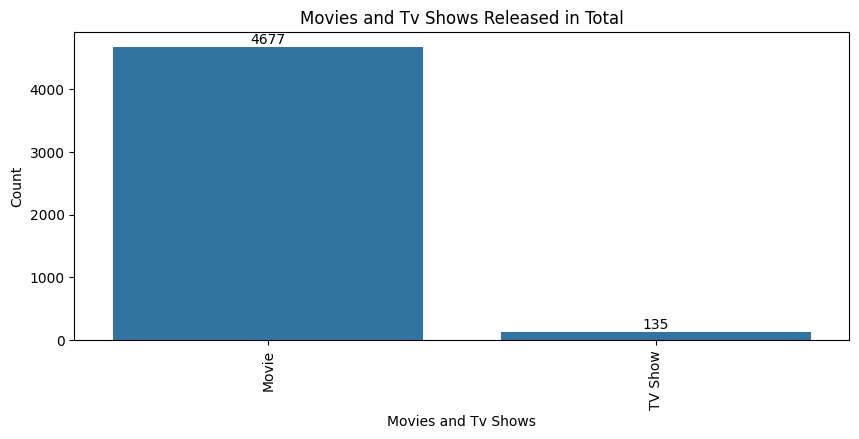

In [ ]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x=show_type.index,y=show_type.values)
plt.xticks(rotation=90)
plt.title('Movies and Tv Shows Released in Total')
plt.xlabel('Movies and Tv Shows')
plt.ylabel('Count')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [ ]:
movies_counrty=data['country'].value_counts().head(10)

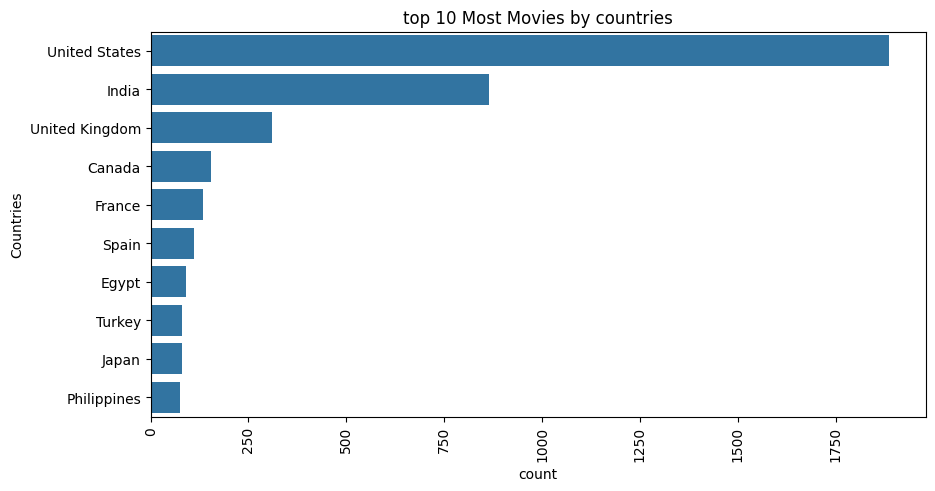

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=movies_counrty.values,y=movies_counrty.index,orient='h')
plt.xticks(rotation=90)
plt.title('top 10 Most Movies by countries')
plt.xlabel('count')
plt.ylabel('Countries')
plt.show()

In [ ]:
movies_with_duration=data.sort_values(by='duration',ascending=False).head(10)
movies_with_duration

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
4262,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,253,A high school teacher volunteers to transform ...,Comedies
2811,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,237,Hoping to prevent their father from skipping t...,Comedies
3349,s5377,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",1964,228,Returning home from war after being assumed de...,Classic Movies
2224,s3522,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,"January 10, 2021",2001,224,"In 1890s India, an arrogant British commander ...",Dramas
2012,s3196,Movie,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,"October 1, 2018",2008,214,"In 16th-century India, what begins as a strate...",Action
4050,s6508,Movie,The Irishman,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,"November 27, 2019",2019,209,Hit man Frank Sheeran looks back at the secret...,Dramas
2068,s3283,Movie,Kabhi Khushi Kabhie Gham,Karan Johar,"Amitabh Bachchan, Jaya Bhaduri, Shah Rukh Khan...",India,"April 1, 2020",2001,209,Years after his father disowns his adopted bro...,Dramas
2807,s4485,Movie,No Direction Home: Bob Dylan,Martin Scorsese,"Bob Dylan, Joan Baez, Dave Van Ronk, Peter Yar...",United Kingdom,"April 25, 2020",2005,208,Featuring rare concert footage and interviews ...,Documentaries
3994,s6410,Movie,The Gospel of Luke,David Batty,"Selva Rasalingam, Karima Gouit, Mourad Zaoui, ...",United States,"October 19, 2018",2015,205,Word-for-word Bible texts of the entire book o...,Dramas
4692,s7575,Movie,What's Your Raashee?,Ashutosh Gowariker,"Harman Baweja, Priyanka Chopra, Manju Singh, A...",India,"August 15, 2020",2009,203,"To protect his family from ruin, Yogesh must m...",Comedies


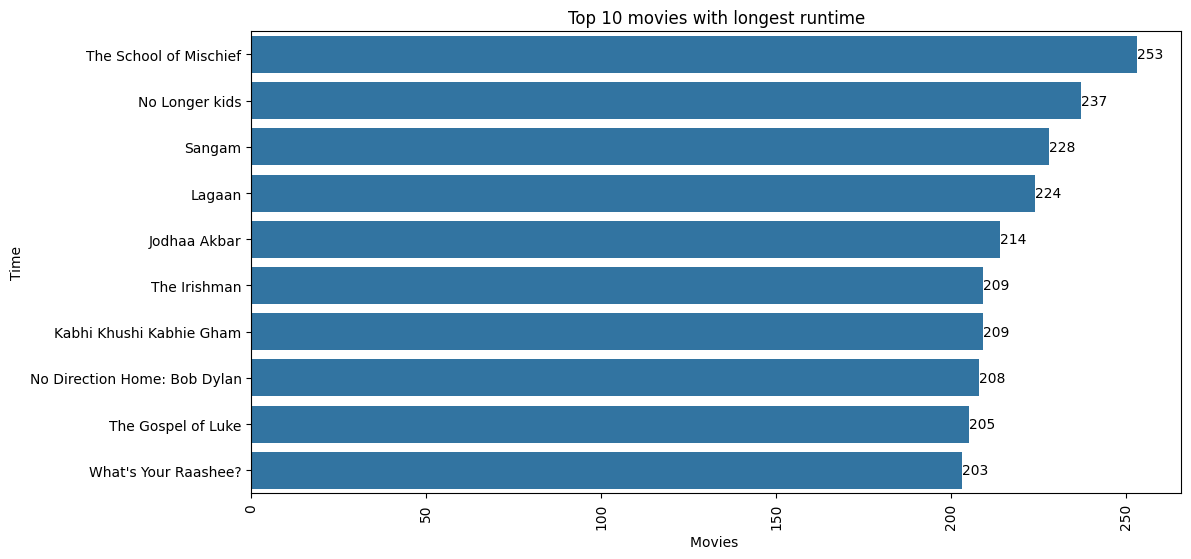

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=movies_with_duration['duration'].head(10),y=movies_with_duration['title'].head(10))
plt.xticks(rotation=90)
plt.title('Top 10 movies with longest runtime')
plt.xlabel('Movies ')
plt.ylabel('Time')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(data['description'])
tfidf_matrix.shape

(4812, 13648)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine=cosine_similarity(tfidf_matrix)

In [ ]:
indices=pd.Series(data.index,index=data['title'])

In [ ]:
def get_recommendations(title, cosine_sim=cosine):
    idx = indices[title]

    sic_z = list(enumerate(cosine_sim[idx]))

    sic_z = sorted(sic_z, key=lambda x: x[1], reverse=True)

    sic_z = sic_z[1:9]

    movie_indices = [i[0] for i in sic_z]

    return data['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Zombieland')

,title
4502,True to the Game
3652,Submission
3308,Rust Creek
3849,The Bridge Curse
2939,Our Idiot Brother
4519,Twins Mission
1232,Ek Khiladi Ek Haseena
2586,Misfit 2


In [ ]:
get_recommendations('1920')

,title
2606,Mohamed Hussein
1763,Hotel Pacific
4061,The King
1642,Happy Old Year
3755,Tezz
4774,You Can’t Fight Christmas
4163,The Muppets
482,Balu Mahi
